In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
# Load Data
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Football_Betting_Models/dummy_match_data.csv")

In [8]:
df.head()

,Unnamed: 0,Date,Home Team,Away Team,Home Goals,Away Goals,BTTS
0,0,2022-11-28,Team I,Team P,0,2,1
1,1,2022-10-17,Team L,Team P,1,3,0
2,2,2023-04-15,Team A,Team P,3,2,0
3,3,2022-08-19,Team G,Team F,1,1,0
4,4,2023-02-13,Team D,Team F,1,3,0


In [9]:
df = df.drop(["Date", "Unnamed: 0"], axis=1)

In [10]:
# Encode Categorical Variables
encoder = LabelEncoder()
df["Home Team"] = encoder.fit_transform(df["Home Team"])
df["Away Team"] = encoder.fit_transform(df["Away Team"])

In [11]:
# Prepare Data
X = df.drop(["BTTS"], axis=1)
y = df["BTTS"]

In [12]:
# Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# Train Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
# Predict on Test Data
y_pred = model.predict(X_test)

Accuracy: 0.375


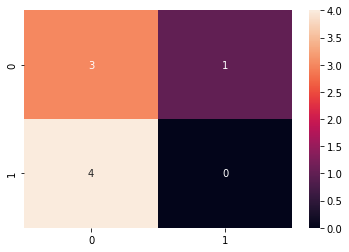

In [15]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [16]:
# Perform 5-fold cross validation on the training data
scores = cross_val_score(model, X_train, y_train, cv=5)

# Print the mean and standard deviation of the cross-validation scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the performance of the model using accuracy metric
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.47 (+/- 0.13)
Accuracy: 0.375


In [19]:
# Classification Reports for model
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.00      0.00      0.00         1

    accuracy                           0.38         8
   macro avg       0.38      0.21      0.27         8
weighted avg       0.66      0.38      0.48         8

